# Stack Overflow

## Introduction 

In the second part of this assignment, we will create and analyze time series of creation dates of Stack Overflow questions. This assignment is to be completed **INDIVIDUALLY** and it is due on **October 7 at 7pm**.

Let's create some time series from the data. You may choose to analyze either users or tags. To analyze users, take the top 100 users with the most question posts. For each user, your time series will be the number of questions posted by that user at some frequency. To analyze tags, take the top 100 most popular question tags. For each tag, your time series will be the number of questions with that tag at some frequency. You may choose to sample your data each week, each month, on a certain day of the week or at certain hours in a day depending on what trend you are hoping to find in the data. For example, if you choose to analyze tags and sample during different hours of the day, your hypothesis could be that languages (i.e. Javascript) that are used more in industry will have more questions posted during work hours, whereas languages (i.e. Python) that are taught in academia will have more questions posted after midnight when students are scrambling to finish their homework.

Compare the time series using one of the methods discussed in class. In a few paragraphs, write down what you were hoping to find in the data, what timeseries you created, what method you chose and why. **(30 pts)**

You may find the [pandas.DataFrame.resample](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html) module helpful.

Method discussion

I will use Norm-based Similarity Measures, and pick p = 2, which is euclidean distance/similarity

the data I pick is top 100 users with most question posts and is sampled each month

I am hoping to find which months is the busiest software company product delivery months.

Hypothesis: Since developers are pushed most before the product is going to deliver, and the deliver date
of most company have fixed dates in a year (According to research, they are March, June, November).

Norm-based Similarity with euclidean is eligible since with (x^2 - y^2)^0.5, we can get the distance clearly. And it is a also good way to measure and validate my assumption and conclude the result

In [1]:
import pandas as pd
import time
import xml.etree.cElementTree as etree
# Get the User and question creation time from raw material
start_time = time.time()

user_time_dic = {}
for event, elem in etree.iterparse("stackoverflow-posts-2015.xml", events = ("start", "end")):
    if event == "end" and elem.tag == "row" and elem.get("PostTypeId") == "1":
        creation_date = elem.get("CreationDate")
        owner_user_id = elem.get("OwnerUserId")
        if (owner_user_id is None or owner_user_id == ""):
            continue
        if (owner_user_id in user_time_dic):
            user_time_dic[owner_user_id].append(creation_date)
        else:
            user_time_dic[owner_user_id] = []
            user_time_dic[owner_user_id].append(creation_date)
        elem.clear()

print("--- %s seconds ---" % (time.time() - start_time))

--- 200.51199984550476 seconds ---


In [2]:
# Get top 100 users with most questions posted

from collections import OrderedDict

ordered_list = []
ordered_dic = OrderedDict(sorted(user_time_dic.items(), key=lambda x: len(x[1]), reverse = True))

i = 0
for key, value in ordered_dic.items():
    if (i > 99):
        break
    else:
        temp = [key,value]
        ordered_list.append(temp)
        i+=1

In [53]:
# Get a matrix with the number of question posts for each user in each month

result = [[None]*12]*100
time_series_result = [None]*100
for i in range(0, 100):
    series = pd.Series(i, index = pd.to_datetime(ordered_list[i][1]))
    
    occurrence = series.resample('M').count()
    time_series_result[i] = occurrence
    occurrence = occurrence.tolist()
    if (len(occurrence) < 12):
        for c in range(len(occurrence), 12):
            occurrence.insert(0, 0)
    result[i] = occurrence

In [55]:
from scipy import spatial
# from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial import distance
import sys

euclidean_norm_distance = [[None]*100]*100
min_dis = sys.maxsize
min_i = 0
min_j = 0
max_dis = 0
max_i = 0
max_j = 0
for i in range(0, 100):
    for j in range(i+1, 100):
        euclidean_num = distance.euclidean(result[i], result[j])
        if (min_dis > min(min_dis, euclidean_num)):
            min_dis = euclidean_num
            min_i = i
            min_j = j
        if (max_dis < max(max_dis, euclidean_num)):
            max_dis = euclidean_num
            max_i = i
            max_j = j

18.547236991
55
73


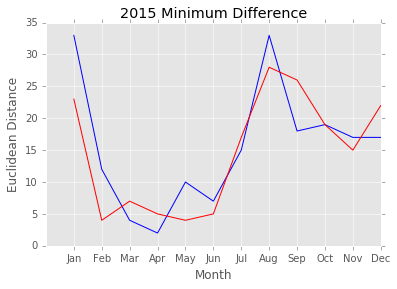

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = result[min_i]
z = result[min_j]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x, y, color = 'blue')
plt.plot(x, z, color = 'red')
plt.xticks(x, labels)
plt.xlabel('Month')
plt.ylabel('Distance')
plt.title("2015 Euclidean Minimum Difference")
plt.show()

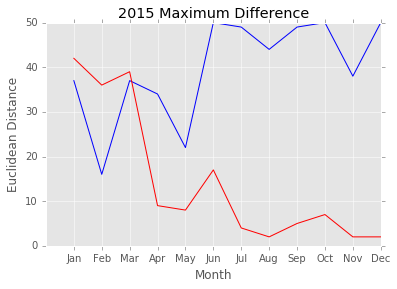

In [64]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = result[max_i]
z = result[max_j]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x, y, color = 'blue')
plt.plot(x, z, color = 'red')
plt.xticks(x, labels)
plt.xlabel('Month')
plt.ylabel('Distance')
plt.title("2015 Euclidean Maximum Distance")
plt.show()

Conclusion

Here we can see from the two graph that, the most busy season in minimum difference are January and August. In maximum difference graph, they are January and June. So different from the previous hypothesis, we can see January is the most busy month in stack overflow, which we can conclude that January is the most busy month for almost all software development companies. Probably because that February is the end of the fiscal year, and most companies will deliver a new product to enhance its annual staticis before the publish of fiscal report.

Choose a different distance/similarity metric and repeat the same time series analysis. Compare the two different metrics you used. **(10 pts)**

In part2, I use manhattan distance and repeat the same time series analysis.
The comparsion is made in the end.

In [82]:
def manhattan_distance(a, b):
    result = 0
    for i in range(0, len(a)):
        result = abs(a[i] - b[i]) + result
    return result

In [83]:
# Change to Manhatton distance, which p = 1, 

Manhattan_distance = 0
min_dis = sys.maxsize
min_i = 0
min_j = 0
max_dis = 0
max_i = 0
max_j = 0

for i in range(0, 100):
    for j in range(i+1, 100):
        Manhattan_distance = manhattan_distance(result[i], result[j])
        if (min_dis > min(min_dis, Manhattan_distance)):
            min_dis = Manhattan_distance
            min_i = i
            min_j = j
        if (max_dis < max(max_dis, Manhattan_distance)):
            max_dis = Manhattan_distance
            max_i = i
            max_j = j

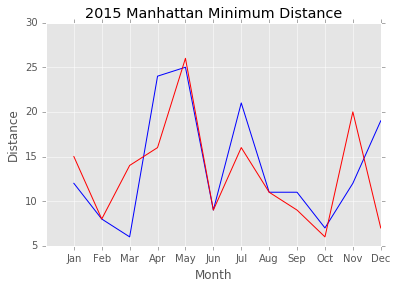

In [87]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = result[min_i]
z = result[min_j]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x, y, color = 'blue')
plt.plot(x, z, color = 'red')
plt.xticks(x, labels)
plt.xlabel('Month')
plt.ylabel('Distance')
plt.title("2015 Manhattan Minimum Distance")
plt.show()

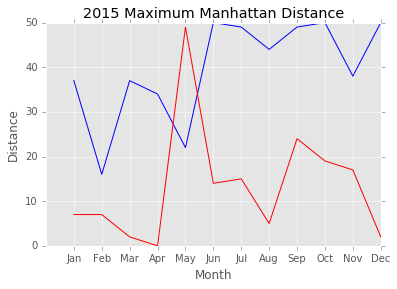

In [88]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y = result[max_i]
z = result[max_j]
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(x, y, color = 'blue')
plt.plot(x, z, color = 'red')
plt.xticks(x, labels)
plt.xlabel('Month')
plt.ylabel('Distance')
plt.title("2015 Maximum Manhattan Distance")
plt.show()

The first difference is the p value
For euclidean methond used in part1, the p is 2 which makes the formular is Σ(Xi^2 - Yi^2)^0.5
When it comes to Manhattan, the p value is 1, which makes the formular is Σ(|Xi - Yi|)

The second difference is when we compare two graph, for euclidean methond, we can clearly see the most busy season is January, which makes sense because no matter in maximum or minimum graph, there must be some month in a year is very busy and shows same trend in the graph. Euclidean method draws a meaningful solution
But for Manhattan method, it seems no shared feature found in the graph. Which makes the method less meaningful

In addition, the largest distance of Euclidean and Manhattan both get around 50, and the least are zero. In which we can see the two methods both get similar size of value